In [390]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
housing = pd.read_csv('Housing.csv')
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [392]:
v =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
housing[v] = housing[v].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [393]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [394]:
housing = pd.concat([housing, status], axis = 1)

In [395]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [396]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [397]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [398]:

##---------------------Train-Test Split and Feature Scaling------------------


In [399]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [400]:
df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=100)

In [401]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
num_vars = ['bedrooms', 'bathrooms', 'stories', 'parking','price','area']
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

In [402]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [403]:
#-----------Dividing into X and Y sets for the model building------

In [404]:
y_train = df_train.pop('price')
x_train = df_train

In [405]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [406]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [407]:
#----Model building----

In [408]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [409]:
def build_model(x,y):
    x = sm.add_constant(x) # Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm


In [410]:
#--------------------Create the first model and clean up features with Colinearity-----------

In [411]:
model1 = build_model(x_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           8.83e-83
Time:                        19:19:27   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

In [412]:
x_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [413]:
# drop calumns whose P value>0.05

x_train1 = x_train.drop(['bedrooms','semi-furnished'], axis=1)

In [414]:
#--------------Re-create the model after dropping the columns-

In [415]:
model2 = build_model(x_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.73e-84
Time:                        19:19:27   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [416]:
#----------------------------RFE----------

In [417]:
lm = LinearRegression()
lm.fit(x_train1,y_train)

rfe = RFE(estimator=LinearRegression(),n_features_to_select=10)
rfe = rfe.fit(x_train1, y_train)

In [418]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [419]:
rfe.ranking_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

In [420]:
x_train1.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')

In [421]:
x_train_rfe = x_train[x_train1.columns[rfe.support_]]
x_train_rfe.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,0.155227,0.0,0.000000,1,0,0,0,0.333333,0,1
19,0.403379,0.5,0.333333,1,0,0,1,0.333333,1,0
159,0.115628,0.5,0.000000,1,1,0,1,0.000000,0,0
35,0.454417,0.5,1.000000,1,0,0,1,0.666667,0,0
28,0.538015,0.5,0.333333,1,0,1,0,0.666667,0,1


In [422]:
#----------------------Create Model using RFE returned Features-------------------

In [423]:
model3= build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           3.13e-84
Time:                        19:19:28   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014     

In [424]:
x_train_rfe = sm.add_constant(x_train_rfe) # Adding the constant
x_train_rfe

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0.333333,0,1
19,1.0,0.403379,0.5,0.333333,1,0,0,1,0.333333,1,0
159,1.0,0.115628,0.5,0.000000,1,1,0,1,0.000000,0,0
35,1.0,0.454417,0.5,1.000000,1,0,0,1,0.666667,0,0
28,1.0,0.538015,0.5,0.333333,1,0,1,0,0.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.118268,0.0,0.000000,1,0,0,0,0.000000,0,1
53,1.0,0.291623,0.5,1.000000,1,0,0,1,0.666667,0,0
350,1.0,0.139388,0.0,0.333333,1,0,1,0,0.333333,0,0
79,1.0,0.366420,0.5,0.666667,1,1,0,1,0.000000,0,0


In [425]:
y_train_pred = model3.predict(x_train_rfe)
y_train_pred.head()

359    0.115965
19     0.476552
159    0.328813
35     0.517770
28     0.450897
dtype: float64

In [426]:

##___--------------------Prediction using Test Data-----------------


In [427]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,1,0,1,0,0,0,1,0,1
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1,0
310,4130000,5985,3,1,1,1,0,1,0,0,0,0,1,0
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,0,0


In [428]:
num_vars = ['area','bathrooms','bedrooms','mainroad','basement','stories', 'parking','price','guestroom','hotwaterheating','airconditioning','parking','prefarea','unfurnished']
df_test1 = pd.DataFrame(scalar.fit_transform(df_test[num_vars]), columns=num_vars)

In [429]:
df_test1

,area,bathrooms,bedrooms,mainroad,basement,stories,parking,price,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,0.084536,0.000000,0.333333,1.0,0.0,0.333333,0.000000,0.247651,0.0,0.0,0.0,0.000000,1.0,0.0
1,0.298969,0.333333,0.333333,1.0,0.0,0.333333,0.333333,0.530201,1.0,0.0,1.0,0.333333,0.0,0.0
2,0.592371,0.000000,0.333333,1.0,0.0,0.000000,0.333333,0.328859,0.0,0.0,0.0,0.333333,1.0,0.0
3,0.252234,0.000000,0.333333,1.0,1.0,0.333333,0.000000,0.261745,1.0,0.0,0.0,0.000000,1.0,0.0
4,0.226804,0.000000,0.666667,1.0,0.0,0.333333,0.000000,0.245638,0.0,0.0,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.020619,0.333333,0.333333,1.0,1.0,0.333333,0.000000,0.154362,0.0,0.0,0.0,0.000000,1.0,1.0
160,0.621993,0.000000,0.333333,1.0,1.0,0.333333,0.000000,0.308725,1.0,0.0,0.0,0.000000,0.0,0.0
161,0.297938,0.000000,0.333333,1.0,1.0,0.000000,0.000000,0.221477,0.0,0.0,0.0,0.000000,0.0,0.0
162,0.298969,0.333333,0.333333,1.0,0.0,1.000000,0.333333,0.546980,0.0,0.0,1.0,0.333333,0.0,0.0


In [430]:
y_test = df_test1.pop('price')
X_test = df_test1

In [431]:
# make predictions.
X_test_new = sm.add_constant(X_test)
#X_test_new = pd.DataFrame(sm.add_constant(X_test))

In [432]:
X_test_new

,const,area,bathrooms,bedrooms,mainroad,basement,stories,parking,guestroom,hotwaterheating,airconditioning,parking,prefarea,unfurnished
0,1.0,0.084536,0.000000,0.333333,1.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,1.0,0.0
1,1.0,0.298969,0.333333,0.333333,1.0,0.0,0.333333,0.333333,1.0,0.0,1.0,0.333333,0.0,0.0
2,1.0,0.592371,0.000000,0.333333,1.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.333333,1.0,0.0
3,1.0,0.252234,0.000000,0.333333,1.0,1.0,0.333333,0.000000,1.0,0.0,0.0,0.000000,1.0,0.0
4,1.0,0.226804,0.000000,0.666667,1.0,0.0,0.333333,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,1.0,0.020619,0.333333,0.333333,1.0,1.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,1.0,1.0
160,1.0,0.621993,0.000000,0.333333,1.0,1.0,0.333333,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0
161,1.0,0.297938,0.000000,0.333333,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
162,1.0,0.298969,0.333333,0.333333,1.0,0.0,1.000000,0.333333,0.0,0.0,1.0,0.333333,0.0,0.0


In [433]:
# Making predictions
y_pred = model1.predict(X_test_new)

In [434]:
#----------Model Performance Comparisn between Train and Test (Generalisation)-----------

In [435]:
from sklearn.metrics import r2_score 
print("Test Prediction R-Sqrd: ", r2_score(y_test, y_pred))

Test Prediction R-Sqrd:  0.5359246982659257


In [436]:
print("Train Prediction R-Sqrd: ", r2_score(y_train, y_train_pred))

Train Prediction R-Sqrd:  0.6759630668130594


Text(0, 0.5, 'y_pred')

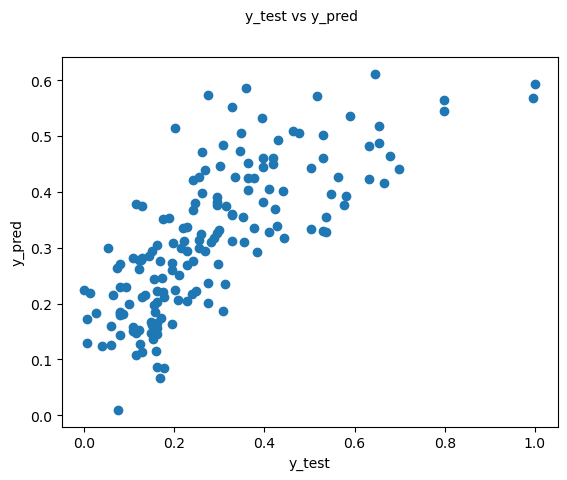

In [437]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 10)              
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('y_pred', fontsize = 10)  

In [438]:

#--------------------------- RIDGE REGRESSION ----------------------


In [439]:
from sklearn.linear_model import Ridge

In [440]:
ridge_regressor = Ridge()

In [441]:
parameters = {'alpha':[0,1,0.01]}

In [442]:
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring="neg_mean_absolute_error",cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0, 1, 0.01]},
             scoring='neg_mean_absolute_error')

In [443]:

print(ridgecv.best_params_)

{'alpha': 1}


In [444]:
print(ridgecv.best_score_)

-0.0678317392763259


In [445]:
ridge_pred = ridgecv.predict(X_test)
ridge_pred

array([0.22219968, 0.4564077 , 0.34816179, 0.3920944 , 0.3771571 ,
       0.2329416 , 0.60512577, 0.30974711, 0.17587458, 0.45424781,
       0.08421121, 0.50510325, 0.29765461, 0.5172659 , 0.42054822,
       0.44380942, 0.56458937, 0.41757911, 0.39148149, 0.44073996,
       0.27705414, 0.20388592, 0.31671089, 0.19614877, 0.1819821 ,
       0.18573273, 0.42531835, 0.45460173, 0.50768318, 0.43586243,
       0.14758592, 0.30530618, 0.1455883 , 0.12932234, 0.31301426,
       0.33682854, 0.26859846, 0.22737174, 0.21293141, 0.25432492,
       0.18703289, 0.31138726, 0.39550259, 0.18276374, 0.17814091,
       0.19806813, 0.29182794, 0.26607007, 0.17398807, 0.39945236,
       0.01178552, 0.33304344, 0.35567231, 0.42180828, 0.44478002,
       0.39030609, 0.48811405, 0.1350989 , 0.12712105, 0.32053988,
       0.17242208, 0.27773386, 0.48038005, 0.33458142, 0.21393706,
       0.13983596, 0.48915232, 0.06736908, 0.11686094, 0.57926477,
       0.12604184, 0.46429923, 0.26878066, 0.21231133, 0.37986

Text(0, 0.5, 'ridge_pred')

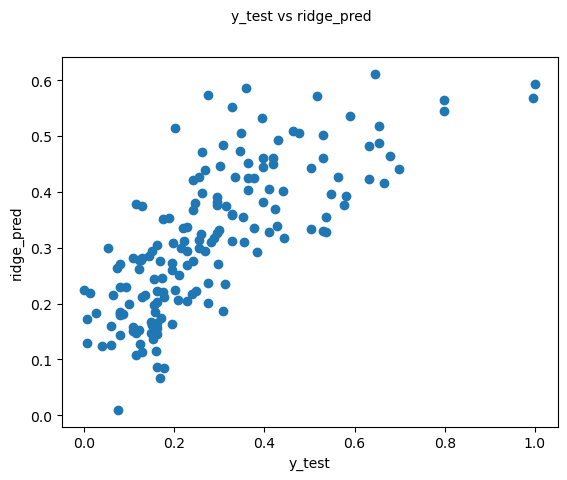

In [446]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs ridge_pred', fontsize = 10)              
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('ridge_pred', fontsize = 10)  

In [447]:

score = r2_score(y_test, ridge_pred)
score

0.5397627253924528

In [448]:

#-------------------------LASSO REGRESSION---------------

In [449]:
from sklearn.linear_model import Lasso

In [450]:
lasso_regressor =Lasso()

In [451]:
parameters = {'alpha':[0,1,0.01]}
lassocv = GridSearchCV(lasso_regressor,parameters,scoring="neg_mean_absolute_error",cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0, 1, 0.01]},
             scoring='neg_mean_absolute_error')

In [452]:
print(lassocv.best_params_)

{'alpha': 0}


In [453]:
print(lassocv.best_score_)

-0.06824998532541168


In [454]:
lasso_pred = lassocv.predict(X_test)
lasso_pred

array([0.22305701, 0.46064047, 0.35909222, 0.39771423, 0.37986468,
       0.23613869, 0.6113269 , 0.31257087, 0.18060247, 0.46126291,
       0.08438387, 0.50845066, 0.29982249, 0.5318934 , 0.42447639,
       0.44603315, 0.56895417, 0.42058667, 0.39342383, 0.44456785,
       0.27799371, 0.20619792, 0.31442753, 0.19870561, 0.18389118,
       0.1830348 , 0.4267835 , 0.46006788, 0.51454037, 0.44052044,
       0.14433605, 0.30480601, 0.14753991, 0.12978289, 0.31789416,
       0.3371443 , 0.26940784, 0.22941206, 0.21092351, 0.25092512,
       0.18581962, 0.31050808, 0.40253806, 0.18338941, 0.17969788,
       0.20009204, 0.29412178, 0.26316818, 0.1745135 , 0.40459955,
       0.00934861, 0.33482389, 0.36085984, 0.42362019, 0.44942046,
       0.39152004, 0.49273272, 0.13608897, 0.12737981, 0.32638698,
       0.17209975, 0.27693251, 0.48268284, 0.33850412, 0.21853988,
       0.14575849, 0.50217012, 0.06599787, 0.11321915, 0.58695527,
       0.12654173, 0.47157787, 0.27043314, 0.21564556, 0.38190

Text(0, 0.5, 'lasso_pred')

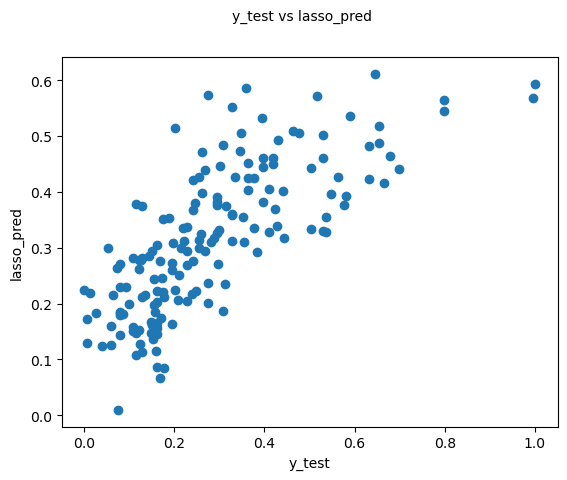

In [455]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs lasso_pred', fontsize = 10)              
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('lasso_pred', fontsize = 10)  

In [456]:
score = r2_score(y_test, lasso_pred)
score

0.5359246982659265